# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)


In [2]:
# Load the Excel file into a DataFrame
df = pd.read_excel('/Users/jdapeman/Documents/Coursera_Retail/Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


* The Excel file contains 541,909 rows
* There are 8 columns 
* The dates look to be from 2010 ot 2011

## Task 2: Perform data cleaning

In [7]:
# Find the rows where 'InvoiceNo' contains "C" in their values
df[df['InvoiceNo'].str.contains('C', na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


* C means that the item was returned. We will keep InvoiceNo and StockCode as objects. 

In [8]:
print("Number of missing values per column:")
print(df.isnull().sum())

print("---------------------------------------------------------------------------------------------")

print("Number of unique values per row:")
print(df.nunique())

Number of missing values per column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
---------------------------------------------------------------------------------------------
Number of unique values per row:
InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [9]:
# Replace null CustomerIDs with "Unknown"
df['CustomerID'].fillna("Unknown", inplace=True)

# Filter rows with non-null 'Description'
df = df[df['Description'].notna()]

In [10]:
columns_to_drop = ["InvoiceNo", "StockCode"]
df.drop(columns=columns_to_drop, inplace=True)

In [11]:
df.head(10)

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [12]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534532 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Description  534532 non-null  object        
 1   Quantity     534532 non-null  int64         
 2   InvoiceDate  534532 non-null  datetime64[ns]
 3   UnitPrice    534532 non-null  float64       
 4   CustomerID   534532 non-null  object        
 5   Country      534532 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 28.5+ MB


In [13]:
# Calculate the gross amount for each transaction (Quantity * UnitPrice)
df = df.assign(Gross=df['Quantity'] * df['UnitPrice'])
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


## Task 3: Statistical Summary

In [14]:
df.describe()

,Quantity,UnitPrice,Gross
count,534532.000000,534532.000000,534532.000000
mean,9.701713,4.644063,18.184379
std,218.789309,97.424304,381.403007
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.900000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000


In [15]:
# Calculate measures of central tendency
median = df.median(numeric_only=True)
median

Quantity     3.00
UnitPrice    2.08
Gross        9.90
dtype: float64

In [16]:
# Create a new column 'MonthYear' with the month and year only for Data Visualization
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M').copy()

# Print the DataFrame with the 'MonthYear' column
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross,MonthYear
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12


## Task 4: Data Visualization

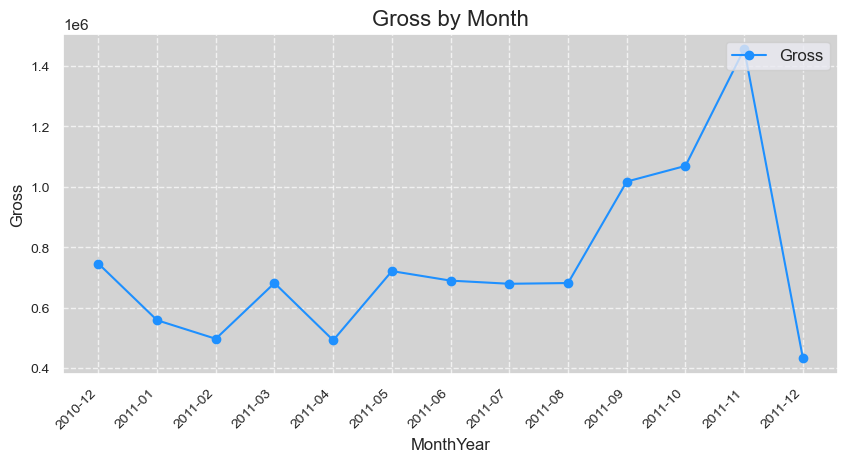

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Group the data by 'MonthYear' and calculate the gross purchase for each month
monthly_data = df.groupby('MonthYear')['Gross'].sum().reset_index()

# Convert the 'MonthYear' column to string format
monthly_data['MonthYear'] = monthly_data['MonthYear'].astype(str)

# Set the figure size using subplots
fig, ax = plt.subplots(figsize=(10, 5))

# Automatic formatting to the x-axis labels when dealing with dates
fig.autofmt_xdate()

# Create a colorful plot with markers and lines
plt.plot(monthly_data['MonthYear'], monthly_data['Gross'], marker='o', linestyle='-', color='dodgerblue', label='Gross')

# Customize the plot
plt.title('Gross by Month', fontsize=16)
plt.xlabel('MonthYear', fontsize=12)
plt.ylabel('Gross', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=12)

# Add a background color to the plot
ax.set_facecolor('lightgray')

# Add more colors and styles if needed
# Example: ax.spines['top'].set_color('none')

plt.show()  # Show the colorful plot


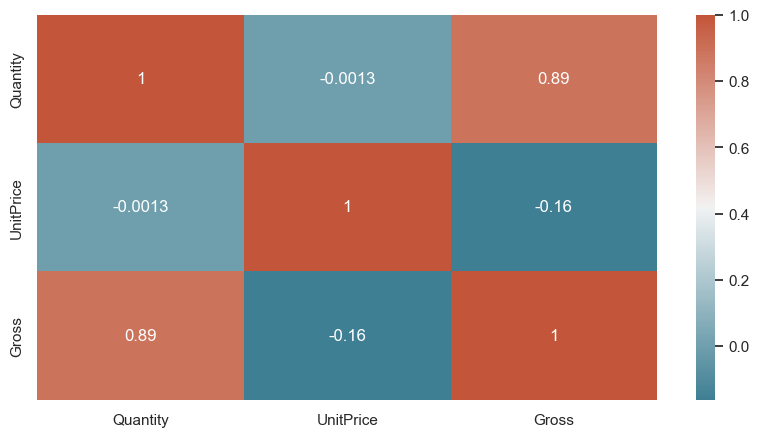

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set its size
plt.figure(figsize=(10, 5))

# Calculate the correlation matrix for specific numeric columns
corr = df.corr(numeric_only=True)

# Define a custom color map
cmap = sns.diverging_palette(220, 20, as_cmap=True)  # Example color map

# Create a heatmap with annotations and the custom color map
sns.heatmap(corr, cmap=cmap, annot=True)

# Display the correlation matrix (optional)
corr

# Show the heatmap
plt.show()


## Step 5: Analyze the Sales Trends over Time

In [19]:
# Create a copy of the 'Month' column
df['Month'] = df['InvoiceDate'].dt.month.values

# Create a copy of the 'DayOfWeek' column
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name().values

# Calculate gross sales for each month
monthly_sales = df.groupby('Month')['Gross'].sum()

# Calculate gross sales for each day of the week
daily_sales = df.groupby('DayOfWeek')['Gross'].sum()

# Identify the busiest month
busiest_month = monthly_sales.idxmax()

# Identify the busiest day of the week
busiest_day = daily_sales.idxmax()

# Print the results
print("Busiest Month (in terms of sales):", busiest_month)
print("Busiest Day of the Week (in terms of sales):", busiest_day)


Busiest Month (in terms of sales): 11
Busiest Day of the Week (in terms of sales): Thursday


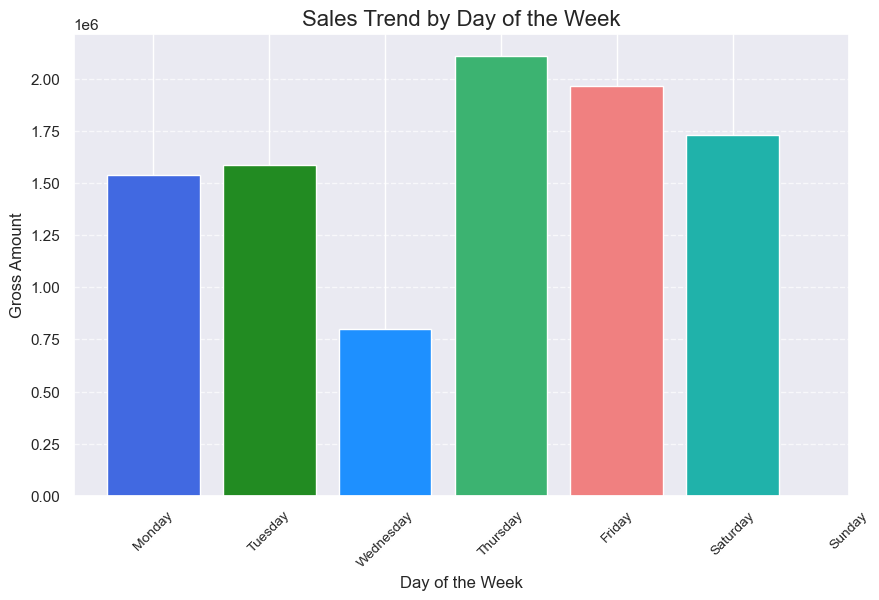

In [20]:
import matplotlib.pyplot as plt

# Create a figure and set its size
plt.figure(figsize=(10, 6))

# Define the colors for the bars
colors = ['royalblue', 'forestgreen', 'dodgerblue', 'mediumseagreen', 'lightcoral', 'lightseagreen', 'orange']

# Create a bar plot
plt.bar(daily_sales.index, daily_sales.values, color=colors)

# Set labels and title
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Gross Amount', fontsize=12)
plt.title('Sales Trend by Day of the Week', fontsize=16)

# Set custom x-axis labels
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(len(days_of_week)), days_of_week, rotation=45, fontsize=10)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [21]:
# Calculate the gross purchase amount for each customer
customer_total_purchase = df.groupby('CustomerID')['Gross'].sum()

# Sort the customers based on the gross purchase amount in descending order
most_valuable_customers = customer_total_purchase.sort_values(ascending=False)

# Convert the Series to a DataFrame
most_valuable_customers_df = pd.DataFrame(most_valuable_customers, columns=['Gross']).reset_index()

# Count the total number of customers in 'df'
total_customers = df['CustomerID'].nunique()

# Print the gross number of customers and the top 10 customers
print('\033[1m' + f"Among {total_customers} customers, the top 10 customers are:" +'\033[0m', list(most_valuable_customers_df['CustomerID'][:10]))

Among 4373 customers, the top 10 customers are: ['Unknown', 14646.0, 18102.0, 17450.0, 14911.0, 12415.0, 14156.0, 17511.0, 16684.0, 13694.0]


## Step 6: Top-selling Products and Countries

In [22]:
# Find most valuable items in the list
items_total_sell = df.groupby('Description')['Gross'].sum()

# Sort the items based on the total sells in descending order
most_valuable_items = items_total_sell.sort_values(ascending=False)

# Convert the Series to a DataFrame
most_valuable_items_df = pd.DataFrame(most_valuable_items, columns=['Gross']).reset_index()

# Count the total number of items in 'df'
total_items = df['Description'].nunique()

# Print the total number of items and the top 10 items
print('\033[1m' + f"Among {total_items} items, the 10 most valuable items are:" +'\033[0m', list(most_valuable_items_df['Description'][:10]))


Among 4223 items, the 10 most valuable items are: ['DOTCOM POSTAGE', 'REGENCY CAKESTAND 3 TIER', 'WHITE HANGING HEART T-LIGHT HOLDER', 'PARTY BUNTING', 'JUMBO BAG RED RETROSPOT', 'RABBIT NIGHT LIGHT', 'POSTAGE', "PAPER CHAIN KIT 50'S CHRISTMAS ", 'ASSORTED COLOUR BIRD ORNAMENT', 'CHILLI LIGHTS']


In [23]:
# Find the country with the most sales in the list
countrywise_sell = df.groupby('Country')['Gross'].sum()

# Sort countries based on the total sales in descending order
top_selling_country = countrywise_sell.sort_values(ascending=False)

# Convert the Series to a DataFrame
top_selling_country_df = pd.DataFrame(top_selling_country, columns=['Gross']).reset_index()

# Count the total number of unique countries in 'df'
total_countries = df['Country'].nunique()

# Print the total number of countries and the top 10 selling countries
print('\033[1m' + f"Among {total_countries} countries, the top 10 selling countries are:" +'\033[0m', list(top_selling_country_df['Country'][:10]))


Among 38 countries, the top 10 selling countries are: ['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France', 'Australia', 'Switzerland', 'Spain', 'Belgium', 'Sweden']


## Step 7: Identify any Outliers or Anomalies in the Dataset

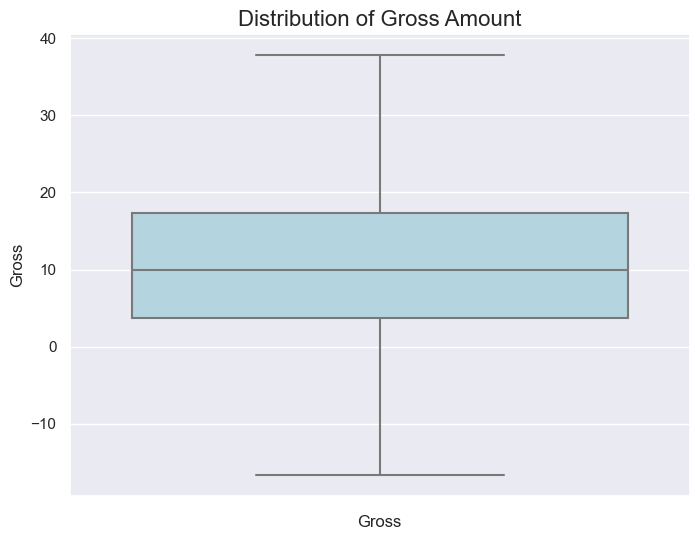

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set its size
plt.figure(figsize=(8, 6))

# Create a box plot for the 'Gross' column
sns.boxplot(data=df, y='Gross', color='lightblue', showfliers=False)  # showfliers=False to remove outliers

# Add a title and labels
plt.title('Distribution of Gross Amount', fontsize=16)
plt.xlabel('Gross', fontsize=12)

# Show the plot
plt.show()


In [25]:
from scipy import stats

# Calculate the Z-Score for the 'Quantity' column
z_scores = stats.zscore(df['Gross'])

# Create a boolean mask to identify outliers (both positive and negative Z-scores)
threshold = 3
outlier_mask = abs(z_scores) > threshold

# Extract outliers from the DataFrame
outliers = df[outlier_mask]

outliers.shape

(396, 10)

In [26]:
# Remove outliers from the main dataset
without_outliers_online_retail = df[~outlier_mask]

# Statistical Summary of data without outliers
summary_without_outliers = without_outliers_online_retail.describe()
summary_without_outliers

,Quantity,UnitPrice,Gross,Month
count,534136.000000,534136.000000,534136.000000,534136.000000
mean,9.408417,3.813369,17.671839,7.549877
std,47.548170,15.533642,44.696246,3.508392
min,-9600.000000,0.000000,-1126.000000,1.000000
25%,1.000000,1.250000,3.750000,5.000000
50%,3.000000,2.080000,9.900000,8.000000
75%,10.000000,4.130000,17.400000,11.000000
max,12540.000000,1154.670000,1158.000000,12.000000


In [27]:
df.describe() # Statistical Summary of data with outliers

,Quantity,UnitPrice,Gross,Month
count,534532.000000,534532.000000,534532.000000,534532.000000
mean,9.701713,4.644063,18.184379,7.550111
std,218.789309,97.424304,381.403007,3.508284
min,-80995.000000,-11062.060000,-168469.600000,1.000000
25%,1.000000,1.250000,3.750000,5.000000
50%,3.000000,2.080000,9.900000,8.000000
75%,10.000000,4.130000,17.400000,11.000000
max,80995.000000,38970.000000,168469.600000,12.000000


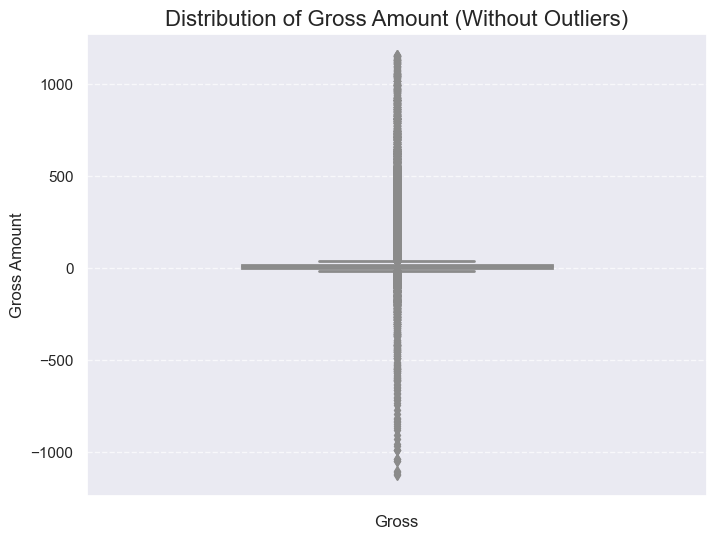

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set its size
plt.figure(figsize=(8, 6))

# Customize the color palette
colors = sns.color_palette("Blues")  # You can choose a different palette

# Create a box plot for the 'Gross' column without outliers
sns.boxplot(data=without_outliers_online_retail, y='Gross', palette=colors, width=0.5, linewidth=2)

# Add a title and labels
plt.title('Distribution of Gross Amount (Without Outliers)', fontsize=16)
plt.xlabel('Gross', fontsize=12)
plt.ylabel('Gross Amount', fontsize=12)

# Add a grid to the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
